<a href="https://colab.research.google.com/github/FaizaAli-Dev/Convolutional-Neural-Network/blob/all-about-AI-and-Data-Science/FED_CNN_Project_CV_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Expression Classification from Facial Images
Learning Objectives:
*   Understand the fundamentals of using a deep ConvNet
*   Learn how to use Tensorflow/Keras
*   Learn how to use Google Colab
*   Learn how to train (fine-tune) a convolutional neural network architecture

# Seven basic expression categories:
 “angry (0)”, “disgust (1)”, “fear (2)”, “happy (3)”, “sad (4)”, “surprise(5)”,or “neutral (6)”

#Steps to follow
•	Line 1: Import the necessary libraries.

•	Line 2: Load the Expression in the Wild dataset.

•	Line 3: Preprocessing

•	Line 4: Create the CNN model.

•	Line 5-9: Add the convolutional layers to the model.

•	Line 10: Add the flattening layer to the model.

•	Line 11: Add the dense layers to the model.

•	Line 12: Compile the model.

•	Line 13: Train the model.

•	Line 14: Evaluate the model through visualization

# Expressions can be useful for
1.   Human-Computer Interaction based recommendation systems to determine whether to push product information or not.  
2.   Determine the psychological state of a person during online interviews

In [ ]:
# Import the necessary libraries
import os  # Operating system functions
import tensorflow as tf  # TensorFlow library
import matplotlib.pyplot as plt  # For data visualization
from keras.models import Sequential  # Keras sequential model
from keras.layers import Convolution2D, MaxPooling2D, Dense, Dropout, Flatten  # Different layers for the model
from keras.optimizers import Adam  # Adam optimizer
from keras.preprocessing.image import ImageDataGenerator  # Data augmentation
import cv2  # OpenCV library for image processing

In [ ]:
# Set the dataset path
dataset_path = 'C:/Users/pc/Documents/d/facial_expression/Dataset'
train_dir = dataset_path + '/train'
test_dir = dataset_path + '/test'

In [ ]:
validation_image_data_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
#Data augmentation parameters setting
data_augumantation = ImageDataGenerator(
    rotation_range=10,      #image rotation degree
    width_shift_range=0.1,  #horizontal shift
    height_shift_range=0.1, #vertical shift
    shear_range=0.1,        #clockwise direction as radians
    zoom_range=0.1,         #zoom range
    horizontal_flip=True,   #flip images horizontally
    fill_mode='nearest'   #pixel value scale [0,1]
)

In [ ]:
batch_size = 128
#size of the image: 48*48 pixels
img_size = 48

training_set = data_augumantation.flow_from_directory(train_dir,
                                                      target_size=(img_size,img_size),
                                                      color_mode="grayscale",
                                                      batch_size=batch_size,
                                                      class_mode='categorical',
                                                      shuffle=True)

Test_set = data_augumantation.flow_from_directory(test_dir,
                                                  target_size=(img_size,img_size),
                                                  color_mode="grayscale",
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 32298 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [ ]:
# data cleaning
classes = os.listdir(train_dir)
images = []

clean_images = []
for i in range(len(images)):
    if os.path.exists(image_paths[i]):
        clean_images.append(images[i])

images = clean_images

In [ ]:
training_set.class_indices

{'anger': 0,
 'disgust': 1,
 'fear': 2,
 'happiness': 3,
 'neutral': 4,
 'sadness': 5,
 'surprise': 6}

In [ ]:
from keras.layers import Conv2D,Input, MaxPooling2D, Dropout, Flatten, Dense, Activation
from keras.models import Model, Sequential
from keras.optimizers import Adam

# no of labels
total_classes= 7

# Initialising the CNN
FEM_model = Sequential()

#1st CNN layer
FEM_model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1))) #1
FEM_model.add(MaxPooling2D(pool_size=(2, 2)))
#2nd CNN layer
FEM_model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
FEM_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
FEM_model.add(Flatten())

#Fully connected 1st layer
FEM_model.add(Dense(256,activation = 'relu'))
#Fully connected layer 2nd layer
FEM_model.add(Dense(512,activation = 'relu'))

FEM_model.add(Dense(total_classes, activation='softmax'))

opt = Adam(learning_rate=0.0001)
FEM_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(FEM_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2

In [ ]:
emotion_model_info = FEM_model.fit(
        training_set ,
        epochs=50,
        validation_data=Test_set)

Epoch 1/50
253/253 [==============================] - 52s 205ms/step - loss: 2.2417 - accuracy: 0.2405 - val_loss: 1.8010 - val_accuracy: 0.2942
Epoch 2/50
253/253 [==============================] - 50s 198ms/step - loss: 1.7739 - accuracy: 0.3025 - val_loss: 1.7154 - val_accuracy: 0.3277
Epoch 3/50
253/253 [==============================] - 50s 197ms/step - loss: 1.7006 - accuracy: 0.3342 - val_loss: 1.6445 - val_accuracy: 0.3505
Epoch 4/50
253/253 [==============================] - 50s 199ms/step - loss: 1.6569 - accuracy: 0.3571 - val_loss: 1.6277 - val_accuracy: 0.3586
Epoch 5/50
253/253 [==============================] - 51s 201ms/step - loss: 1.6129 - accuracy: 0.3749 - val_loss: 1.6238 - val_accuracy: 0.3803
Epoch 6/50
253/253 [==============================] - 52s 206ms/step - loss: 1.5908 - accuracy: 0.3851 - val_loss: 1.6048 - val_accuracy: 0.3845
Epoch 7/50
253/253 [==============================] - 50s 197ms/step - loss: 1.5608 - accuracy: 0.3967 - val_loss: 1.5555 - val_ac

In [ ]:
import tensorflow as tf
%reload_ext tensorboard

In [ ]:
%tensorboard --logdir logs/fit/

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

In [ ]:
# Access the training history
training_accuracy = emotion_model_info.history['accuracy']
validation_accuracy = emotion_model_info.history['val_accuracy']
training_loss = emotion_model_info.history['loss']
validation_loss = emotion_model_info.history['val_loss']

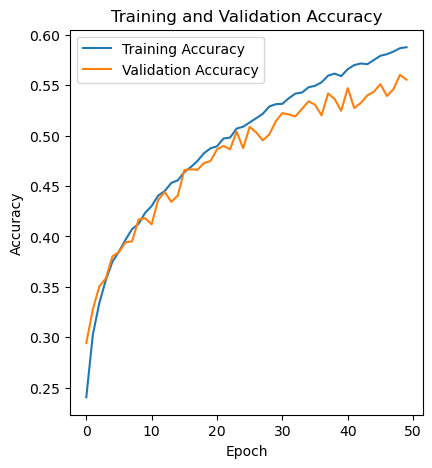

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

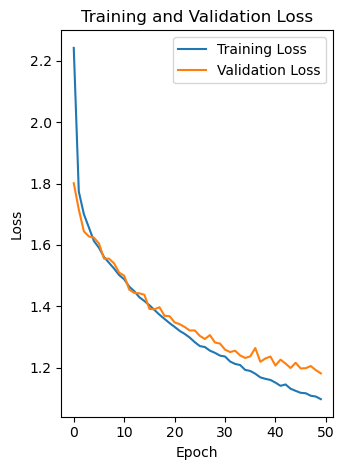

In [ ]:
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()